Example: Variability Estimates of State Population

In [2]:
from scipy.stats import trim_mean
import pandas as pd
import numpy as np
import wquantiles 

import common
from pathlib import Path

from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
states = pd.read_csv("state.csv")
print(states.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [4]:
print(states["Population"].std())

6848235.347401142


In [5]:
print(states["Population"].quantile(0.75) - states["Population"].quantile(0.25))

4847308.0


In [6]:
print(robust.mad(states['Population']))
print(abs(states['Population'] - states['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


Percentiles and Boxplots

In [7]:
print(states['Murder.Rate'].quantile([0.05, 0.25, 0.50, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


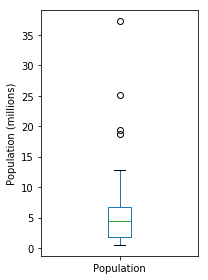

In [8]:
axs = ((states['Population']/1000000).plot.box(figsize=(3,4)))
axs.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

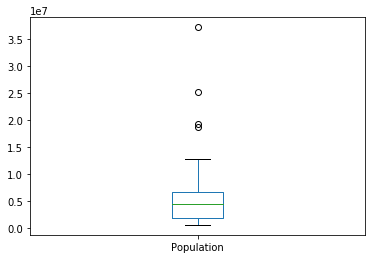

In [9]:
#another solution With pandas, using "states" dataframe
#states = pd.read_csv("state.csv")
states.boxplot(column =['Population'], grid = False) 

Frequency Table and Histograms

In [10]:
binned_population = pd.cut(states["Population"],10)
print(binned_population.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


In [11]:
binned_population.name = 'binned_population'
df = pd.concat([states, binned_population], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binned_population'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))


                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

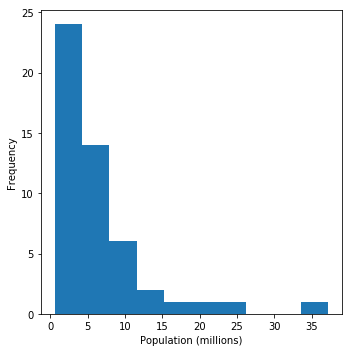

In [12]:
ax = (states['Population'] / 1_000_000).plot.hist(figsize=(5, 5))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

Density Estimates

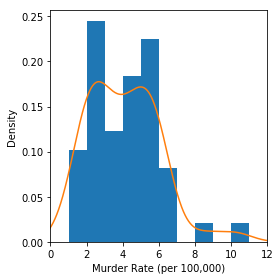

In [13]:
axs = states['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
states['Murder.Rate'].plot.density(ax=axs)
axs.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

Exploring Binary and Categorical Data

In [18]:
# Table 1-6
dfw = pd.read_csv("dfw_airline.csv")
print((dfw*100)/(dfw.values.sum()))

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


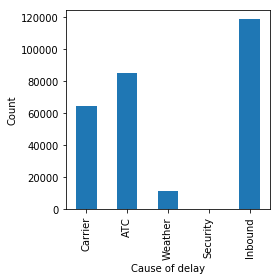

In [22]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Correlation

In [24]:
sp500_sym = pd.read_csv("sp500_sectors.csv")
sp500_px = pd.read_csv("sp500_data.csv")

In [27]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecomSt = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecomSt.corr()
print(telecomSt)

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'